In [ ]:
import pandas as pd
import numpy as np
from math import ceil
from google.colab import drive
import pickle
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import string
from math import ceil
import seaborn as sns

import datetime
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
parent_path = '/content/drive/MyDrive/ITC_training/Dataset/'

In [ ]:
train=pd.read_csv(str(parent_path)+'/MNIST_train.csv')

In [ ]:
train.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


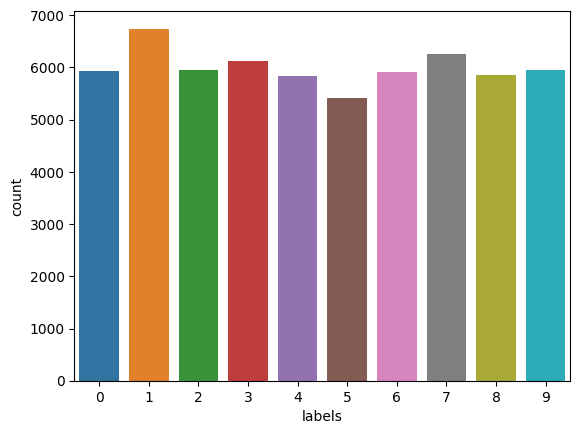

In [ ]:
# Dropping unnecessary columns
sns.countplot(x='labels',data = train)

plt.savefig('./mnist_countplot.png', dpi=300)
plt.show()

**Key Insights from Class Distribution in the Dataset**

1) Balanced class distribution

2) Each class has a similar sample size

3) Likely a multiclass classification problem with 10 classes (0-9)

4) Sufficient data for each class to train machine learning models

5) No apparent need for resampling techniques to address class imbalance



In [ ]:
# Dropping unnecessary columns
data_cleaned = train.drop(['Unnamed: 0', 'index'], axis=1)

# Splitting the data into features and labels
X_train = data_cleaned.drop('labels', axis=1)
y_train = data_cleaned['labels']

X_train = X_train / 255.0  # Normalizing the data

# Displaying the sizes of the training and testing sets
(X_train.shape, y_train.shape)

((60000, 784), (60000,))

In [ ]:
#Loading the test data
test=pd.read_csv(str(parent_path)+'/MNIST_test.csv')

# Dropping unnecessary columns
data_cleaned = test.drop(['Unnamed: 0', 'index'], axis=1)

# Splitting the data into features and labels
X_test = data_cleaned.drop('labels', axis=1)
y_test = data_cleaned['labels']

X_test = X_test / 255.0  # Normalizing the data

# Displaying the sizes of the training and testing sets
(X_test.shape, y_test.shape)

((10000, 784), (10000,))

In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# considering dataset to numpy array values
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

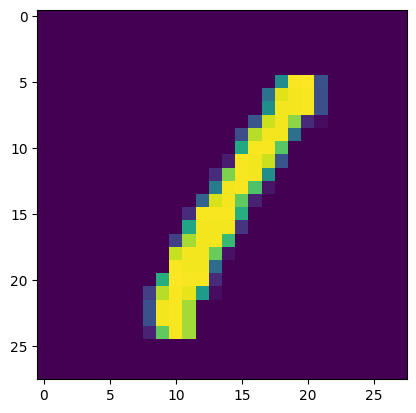

1

In [ ]:
# visualise some sameples

def drawImg(sample):
  img= sample.reshape((28,28))
  plt.imshow(img)
  plt.show()

drawImg(X_train[3])

y_train[3]

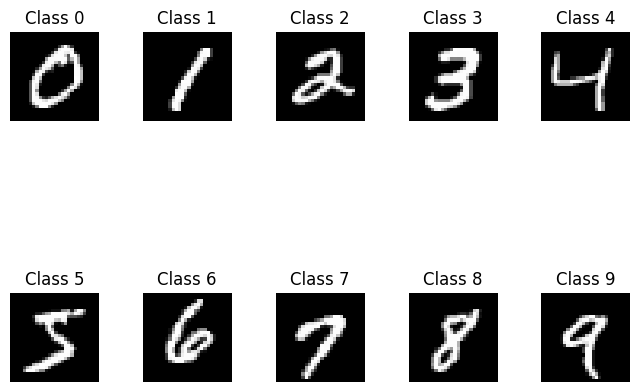

In [ ]:
num_classes = 10
max_images_per_row = 5
num_rows = (num_classes + max_images_per_row - 1) // max_images_per_row

fig, axes = plt.subplots(num_rows, max_images_per_row, figsize=(8, 6))

for i in range(num_classes):
    class_images = X_train[y_train == i]  # Filter images of the current class
    if len(class_images) > 0:
        image = class_images[0].reshape(28, 28)
        row_idx = i // max_images_per_row
        col_idx = i % max_images_per_row
        axes[row_idx, col_idx].imshow(image, cmap='gray')
        axes[row_idx, col_idx].axis('off')
        axes[row_idx, col_idx].set_title(f'Class {i}')

for i in range(num_classes, num_rows * max_images_per_row):
    fig.delaxes(axes.flatten()[i])

plt.subplots_adjust(hspace=0.3, wspace=0.5)
# plt.savefig(parent_path+'train_images.png')
plt.show()

In [ ]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

### PCA

In [ ]:
def get_selected_eigenvectors(X, n_components = 100):
    '''
    Compute selected eigenvectors of the covariance matrix of X.

    Parameters:
    X (ndarray): A matrix where each row is a data sample.
    n_components (int): Number of eigenvectors to select.

    Returns:
    ndarray: Selected eigenvectors.
    '''
    cov_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    explained_variance = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance)

    selected_eigenvectors = eigenvectors[:, :n_components]

    return selected_eigenvectors, explained_variance, cumulative_variance

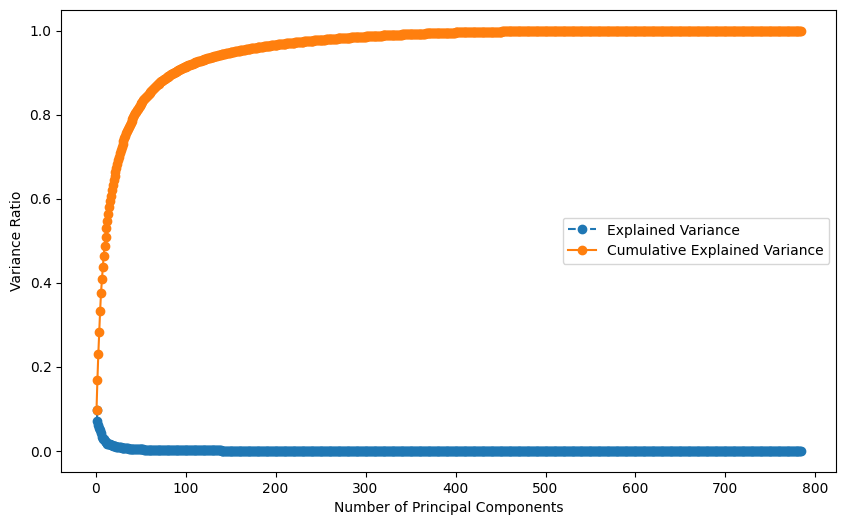

In [ ]:
selected_eigenvectors, explained_variance, cumulative_variance = get_selected_eigenvectors(X_train)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.legend()

# plt.savefig(parent_path+'/pca_variance.png',dpi=300)
plt.show()

# X_train_pca = np.dot(train_X, selected_eigenvectors)
# X_test_pca = np.dot(test_X, selected_eigenvectors)

In [ ]:
selected_eigenvectors, _, _ = get_selected_eigenvectors(X_train)
X_train_pca = np.dot(X_train, selected_eigenvectors)
X_test_pca = np.dot(X_test, selected_eigenvectors)

### Gaussian Naive Bayes

In [ ]:
from scipy.stats import multivariate_normal as mvn

class GaussNB():

    def fit(self, X, y, epsilon = 1e-2):

        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))
        for k in self.K:
            # _ is used for subscripts
            X_k = X[y==k,:]
            self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":X_k.var(axis=0)+ epsilon}
            self.priors[k] = len(X_k)/len(X)

    def predict(self, X):

        N, D = X.shape
        P_hat = np.zeros((N,len(self.K)))
        for k, l in self.likelihoods.items():
        # Applying Bayes theorem
            P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

In [ ]:
gnb = GaussNB()
gnb.fit(X_train_pca, y_train)

In [ ]:
y_hat = gnb.predict(X_test_pca)
accuracy(y_test, y_hat)

0.8815

In [ ]:
y_hat = gnb.predict(X_train_pca)
accuracy(y_train, y_hat)

0.8741333333333333

### Gaussian Bayes

In [ ]:
class GausBayes():

  def fit(self, X, y, epsilon = 1e-2):
    self.likelihoods =dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k   = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0),
                             "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):
    N, D=  X.shape
    self.P_hat = np.zeros((N, len(self.K)))
    for k, l in self.likelihoods.items():
      self.P_hat[:,k]= mvn.logpdf(X,l["mean"],l["cov"])+ np.log(self.priors[k])

    return self.P_hat.argmax(axis=1)

In [ ]:
gb = GausBayes()
gb.fit(X_train_pca, y_train)

In [ ]:
y_hat2 = gb.predict(X_test_pca)
accuracy(y_test, y_hat2)

0.9636

In [ ]:
y_hat2 = gb.predict(X_train_pca)
accuracy(y_train, y_hat2)

0.9645166666666667

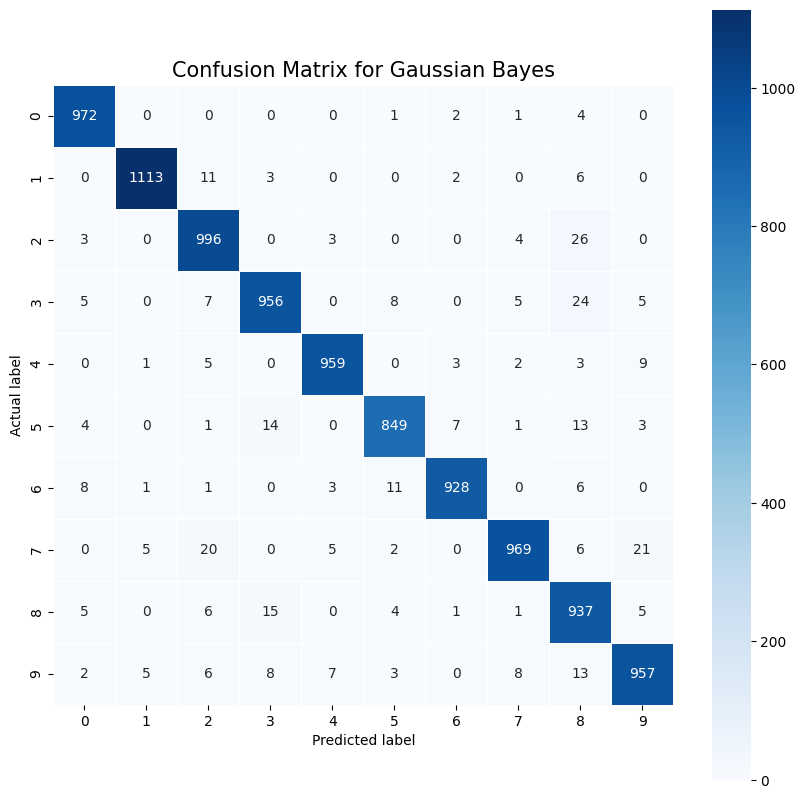

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_hat2)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Gaussian Bayes', size = 15)
plt.savefig('./Confusion Matrix standard gnb.png', dpi=300)
plt.show()

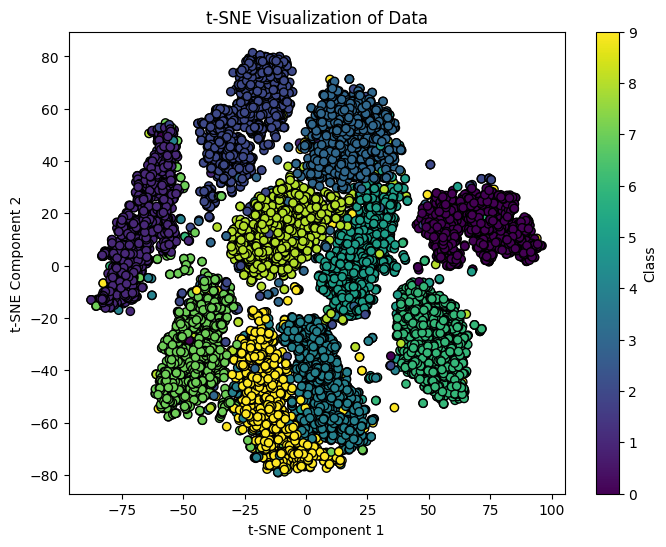

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
n_components = 2
tsne = TSNE(n_components=n_components)
X_tsne = tsne.fit_transform(X_test_pca)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Data')
plt.colorbar(label='Class')
# plt.savefig(parent_path+'test_pca_tsne_plot.png')
plt.show()

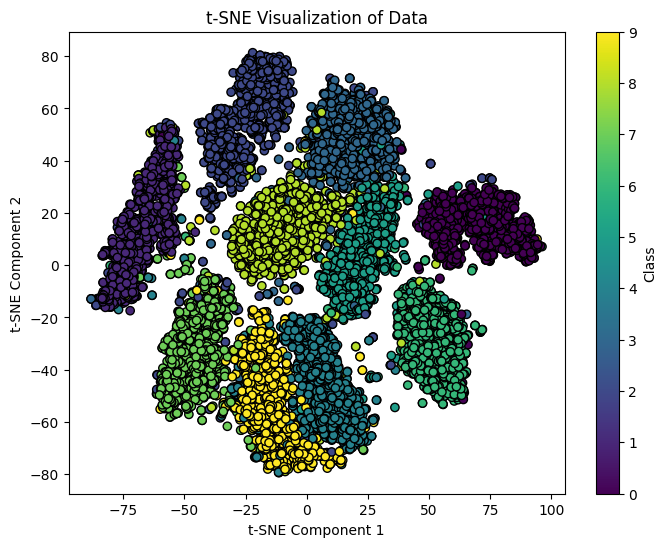

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction (you can adjust the number of components)
n_components = 2
tsne = TSNE(n_components=n_components)
X_tsne = tsne.fit_transform(X_test_pca)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_hat2, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Data')
plt.colorbar(label='Class')
# plt.savefig(parent_path+'test_pred_pca_tsne_plot.png')
plt.show()

In [ ]:
class KNNClassifier():
  """
    X: The data points that we want to classify.
    K: The number of nearest neighbors to consider for making the predictions.
    epsilon: A small number added to distances to avoid division by zero when calculating weights
  """
  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon =1e-3):

    N=len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt  = np.argsort(dist2)[:K]

      # Compute the weights (influence) of the neighbors
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      # Predict the class by performing a weighted vote
      y_hat[i] = np.bincount(self.y[idxt], weights= gamma_k).argmax()

    return y_hat

In [ ]:
#Best k

Accuracy = []

# Loop only over k = 3, 5, 7, 9
for i in [3, 5, 7, 9]:
    knn = KNNClassifier()
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test, i)
    acc = accuracy(y_test, prediction)
    Accuracy.append(acc)
    print(f"Accuracy for k = {i}: {acc}")

# Finding the best k
best_k = [3, 5, 7, 9][Accuracy.index(max(Accuracy))]
print(f"The best k is: {best_k}")


Accuracy for k = 3: 0.9705
Accuracy for k = 5: 0.9688
Accuracy for k = 7: 0.9694
Accuracy for k = 9: 0.9659
The best k is: 3


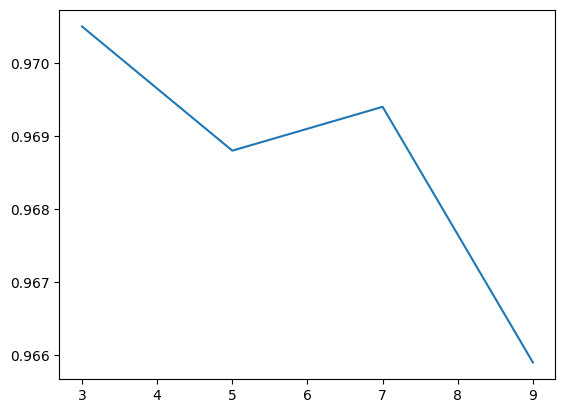

In [ ]:
k_values = [3, 5, 7, 9]
plt.plot(k_values, Accuracy)
# plt.savefig('./Acc-with-k-values.png', dpi=300)
plt.show()

**Performance Trend of K-Nearest Neighbors Classifier with Varying 'k' Values**

1) The graph shows that the KNN model achieves peak accuracy with a 'k' value =3.

2)  Accuracy decreases as 'k' becomes larger, suggesting that too large a 'k' value may incorporate too much noise and cause the model to underfit.

3) The model shows stable performance at lower 'k' values before the optimal point, implying that a minimal number of neighbors is sufficient to capture the underlying pattern without being too sensitive to noise.

4)  The decision to use only odd 'k' values is strategic to ensure that the model does not encounter ties, which could lead to ambiguous predictions.

In [ ]:
# Create an instance of KNNClassifier and fit it with the training data
knn = KNNClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
K = 3 # number of nearest neighbors
y_pred = knn.predict(X_test, K)

In [ ]:
# Calculate the accuracy
accuracy = accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9717


**Standard KNN obtained an accuracy of 97.17%**

In [ ]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



The classifier demonstrates excellent overall performance with high precision, recall, and F1-scores across all classes, indicating robust predictive capability and consistency.

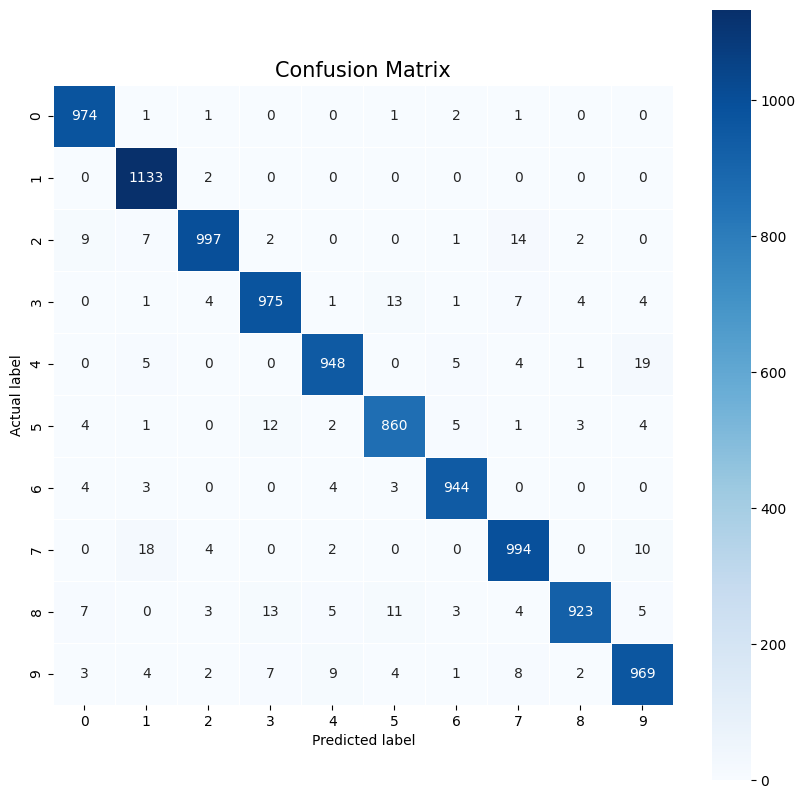

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
# plt.savefig('./Confusion Matrix standard knn.png', dpi=300)
plt.show()

### ERROR Analysis

In [ ]:
# Find misclassified images
misclassified_idx = np.where(y_test != y_pred)[0]

for idx in misclassified_idx:
    image = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    predicted_label = y_pred[idx]
    filename = f"{parent_path+'/mis_data/'}{true_label}_{predicted_label}_{idx}.png"
    plt.imsave(filename, image, cmap='gray')

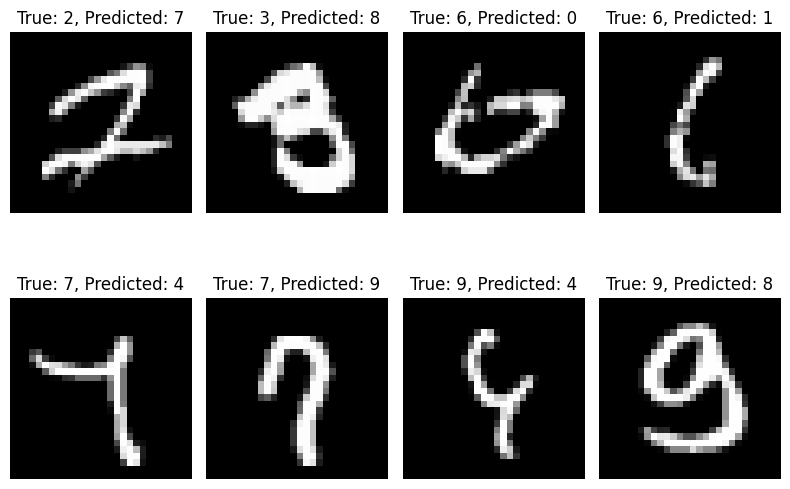

In [ ]:
import os
from PIL import Image

image_directory = parent_path + '/misclassified/'
image_files = [f for f in os.listdir(image_directory) if f.endswith(".png")]

num_images = len(image_files)
num_rows = (num_images + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(8, 3 * num_rows))

for i, image_file in enumerate(image_files):
    row = i // 4
    col = i % 4

    # Load the image
    img_path = os.path.join(image_directory, image_file)
    img = Image.open(img_path)

    # Get true label and predicted label from the filename
    true_label, predicted_label = image_file.split('_')

    title = f"True: {true_label}, Predicted: {predicted_label.split('.')[0]}"

    axes[row, col].imshow(img)
    axes[row, col].set_title(title)
    axes[row, col].axis('off')


for i in range(num_images, num_rows * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
# plt.savefig(parent_path+'/mnist_misclass.png', dpi=300)
plt.show()


# KNN with PCA

1) PCA for Dimensionality Reduction: Implemented Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, retaining significant features.

2) Optimizing Feature Set: Selected the top 100 eigenvectors based on the covariance matrix of the dataset, focusing on the most informative aspects.

3) Eigenvalue-Based Feature Selection: Sorted eigenvalues in descending order to identify and select principal components that capture the most variance.

4) Transforming Training and Test Data: Applied the PCA transformation to both training and test datasets to align them in the reduced feature space.

5) Efficiency in Computation: Reduced dimensions likely led to faster computation times and less memory usage without compromising information integrity.

6) Enhanced Model Performance: Achieved a notable accuracy of 0.9743, indicating that PCA effectively captured essential data characteristics for improved model prediction.

7) Balancing Data Complexity and Accuracy: Demonstrated how reducing data complexity via PCA can lead to high accuracy, balancing computational efficiency with predictive performance

In [ ]:
knn_classifier = KNNClassifier()
knn_classifier.fit(X_train_pca,y_train)

In [ ]:
K=3
y_pred = knn_classifier.predict(X_test_pca,K)
# Calculate the accuracy
accuracy = accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9743


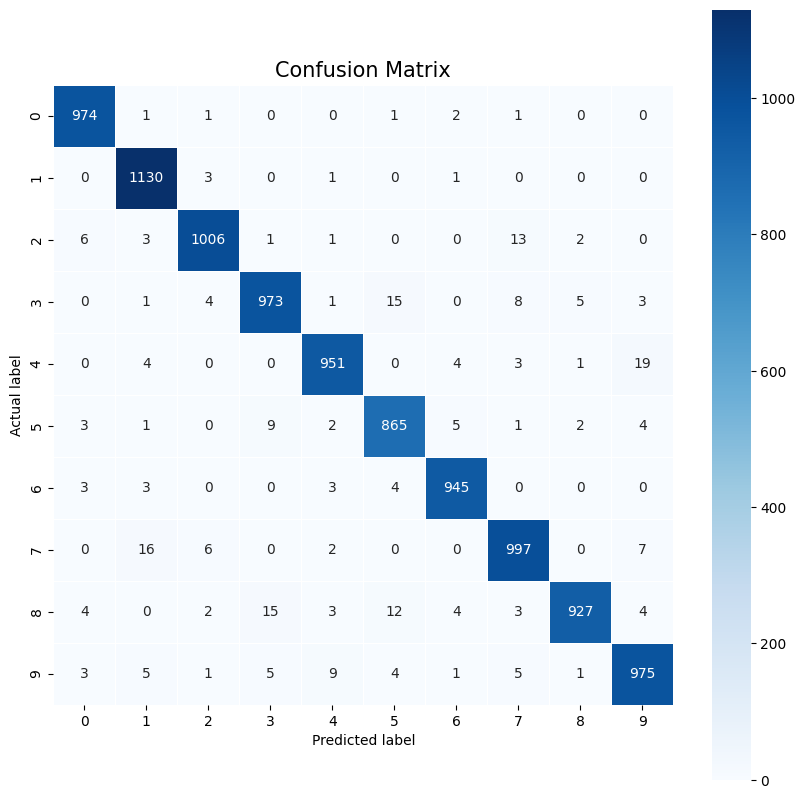

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.savefig('./Confusion Matrix pca knn.png', dpi=300)
plt.show()

In [ ]:
K=1
y_pred = knn_classifier.predict(X_test_pca,K)
# Calculate the accuracy
accuracy = accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9716


# Training

In [ ]:
K=3
y_train_pred = knn_classifier.predict(X_train_pca,K)
# Calculate the accuracy
accuracy = accuracy(y_train, y_train_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


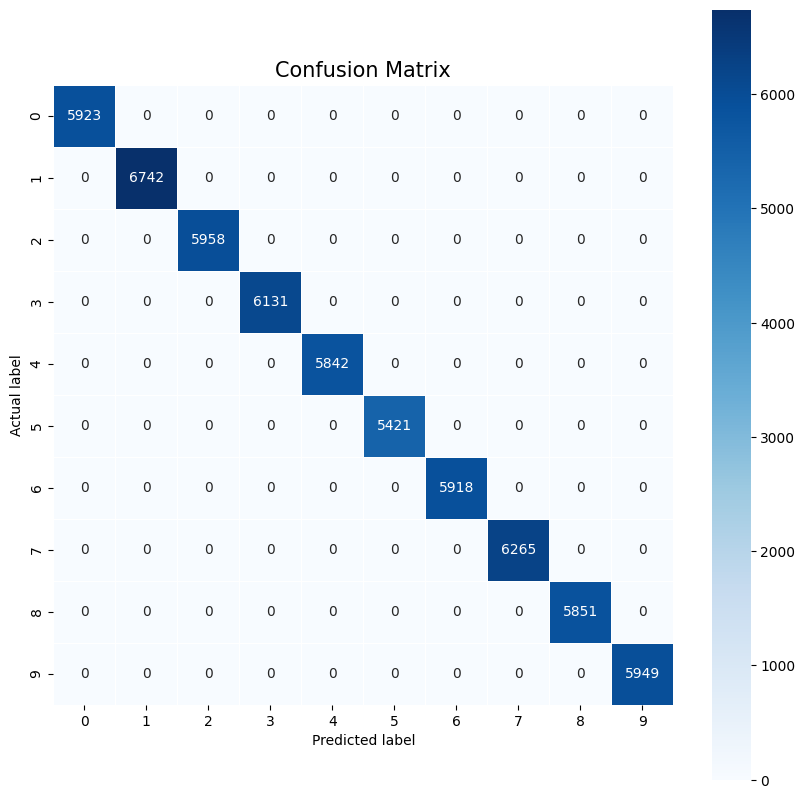

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

# Conclusion



1) **Standard KNN**: Achieved an impressive accuracy of **97.17%**, demonstrating strong predictive capabilities in its basic form.

2) **KNN with PCA**: Slightly improved accuracy to **97.43%**, indicating that dimensionality reduction can enhance performance.

3) **Gaussian Bayes with PCA** resulted accuracy of **96.36%** which is much better model as it is simple consuming less computation and powerful.  

